In [42]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

%matplotlib inline

In [83]:
raw_data = pd.read_csv("Logisticdata.csv")

raw_data.head(5)
raw_data.shape

(1006, 14)

# Data Processing

### Exploratory Data Analysis

In [79]:
raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [45]:
raw_data = raw_data.dropna()

raw_data.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [46]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

In [47]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1003
Data columns (total 14 columns):
Type of Account          1001 non-null object
Account History          1001 non-null object
Reason for the Loan      1001 non-null object
Loan Amount              1001 non-null float64
Account Savings          1001 non-null object
Employment History       1001 non-null object
Individual Stauts        1001 non-null object
Other Loans              1001 non-null object
Security / Collateral    1001 non-null object
Age                      1001 non-null float64
Residence Status         1001 non-null object
Job                      1001 non-null object
Completed Other loan?    1001 non-null object
Good Loan                1001 non-null object
dtypes: float64(2), object(12)
memory usage: 117.3+ KB


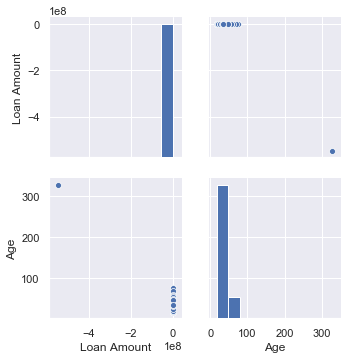

In [48]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

# Data Cleanig

In [49]:
# Deleting the outlier

raw_data = raw_data[raw_data['Age'] < 100]

raw_data.shape


(1000, 14)

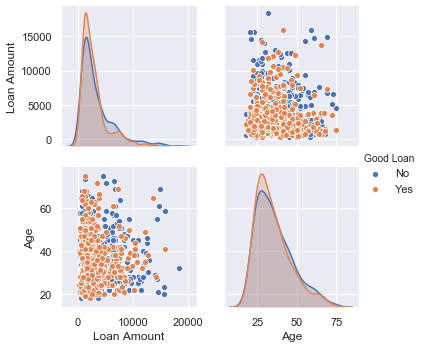

In [50]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data, hue = 'Good Loan')

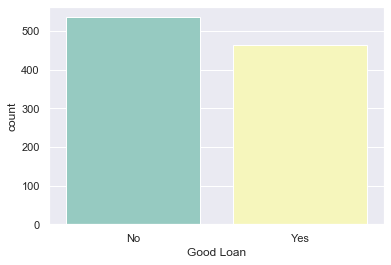

In [51]:
# Investigating the distr of y

sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')

In [52]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

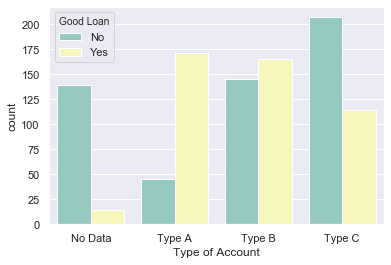

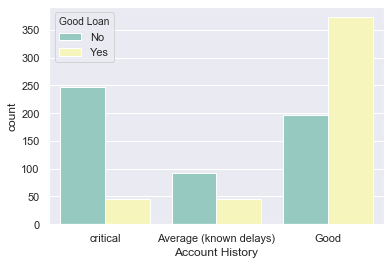

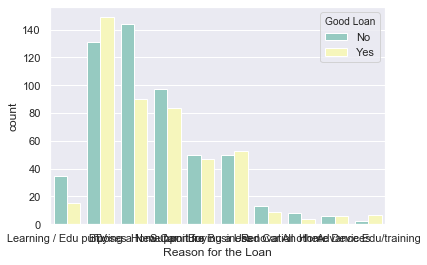

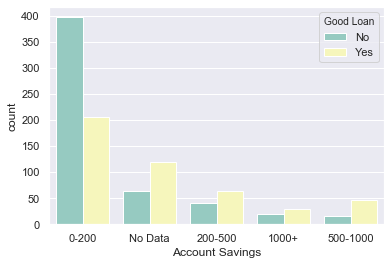

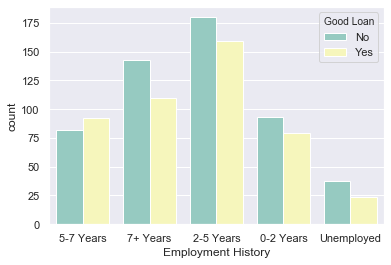

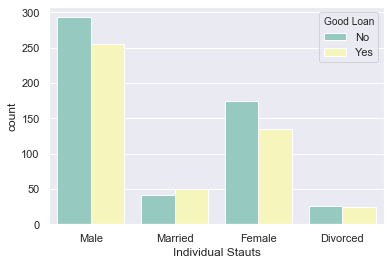

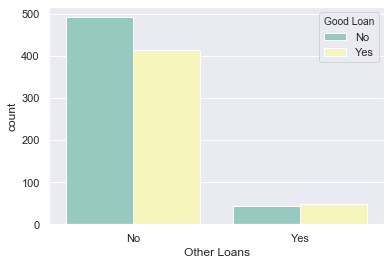

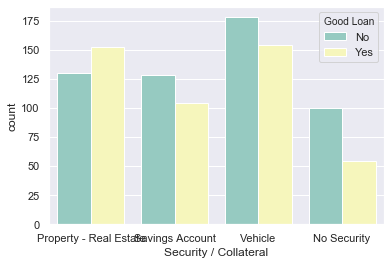

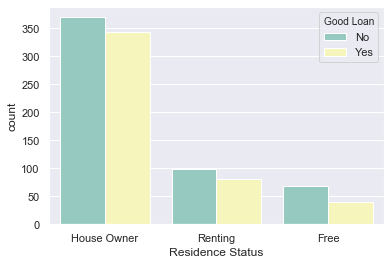

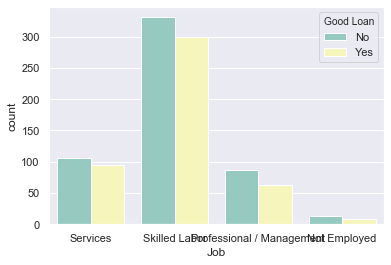

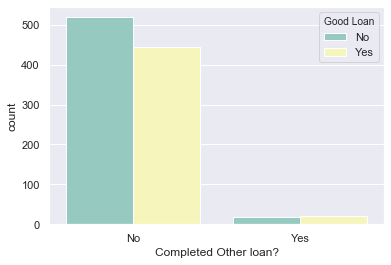

In [53]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [54]:
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [55]:
#Making categorical variables into numeric representation

raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library


# print the shape
print(raw_data.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
raw_data['Good Loan'][raw_data['Good Loan'] == 'Yes'] = 1
raw_data['Good Loan'][raw_data['Good Loan'] == 'No'] = 0

# Visualizing the data
raw_data

(1000, 49)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


# Feature Seclection

Next Lecture with Tree-based estimators (i.e. decision trees & random forests)


In [56]:
# Split the data into X & y

X = raw_data.drop('Good Loan', axis = 1).values
y = raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [57]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [58]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12122079844891431
The feature importance for Age is : 0.07962988068108864
The feature importance for Type of Account_No Data is : 0.054236275712355064
The feature importance for Type of Account_Type A is : 0.04973253970745607
The feature importance for Type of Account_Type B is : 0.0
The feature importance for Type of Account_Type C is : 0.026698167265803152
The feature importance for Account History_Average (known delays) is : 0.0026219295620499047
The feature importance for Account History_Good is : 0.19131616315491018
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is : 0.00657340597791024
The feature importance for Reason for the L

In [59]:

# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


# Splitting Data

In [60]:
print(raw_data.shape)
print(raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]

(1000, 49)
(1000, 40)


In [61]:
# Split the data into X & y

X = raw_data[columns_to_keep].values
X

y = raw_data['Good Loan']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(1000, 40)
(1000,)


In [62]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)



print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(800, 40)
(200, 40)
(800,)
(200,)


# Running the Logistic Regression Model

In [65]:
# Training my model

model = LogisticRegression(random_state=15)
model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=15, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=15, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
model.score(X,y)

0.783

In [72]:
model.score(X_train, y_train)

0.78625

In [73]:
model.score(X_test, y_test)

0.77